# ERAとFIPによるNPB投手分析（2024年）

このNotebookでは、2024年NPBセ・リーグの実際の投手成績データを用いて、ERAとFIPの比較分析、およびERA予測モデルを構築します。

In [1]:
# 必要なライブラリ
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## データの読み込み

In [2]:
# CSVファイルを読み込み
df = pd.read_csv("2024_Central_Pitcher_Data.csv")
df.head()

,Name,IP,HR,BB,HBP,K,ERA
0,髙橋 宏斗,143.0,1,2,4,130,1.38
1,菅野 智之,156.0,6,0,4,111,1.67
2,才木 浩人,167.0,4,2,0,137,1.83
3,大瀬良 大地,155.0,5,3,3,98,1.86
4,戸郷 翔征,180.0,12,3,7,156,1.95


## FIPの計算

In [3]:
# FIPの計算
C = 3.20  # 補正定数（仮）
df['FIP'] = ((13 * df['HR'] + 3 * (df['BB'] + df['HBP']) - 2 * df['K']) / df['IP']) + C
df['ERA-FIP差'] = df['ERA'] - df['FIP']
df[['Name', 'ERA', 'FIP', 'ERA-FIP差']].head()

,Name,ERA,FIP,ERA-FIP差
0,髙橋 宏斗,1.38,1.598601,-0.218601
1,菅野 智之,1.67,2.353846,-0.683846
2,才木 浩人,1.83,1.906587,-0.076587
3,大瀬良 大地,1.86,2.470968,-0.610968
4,戸郷 翔征,1.95,2.500000,-0.550000


## ERAとFIPの比較（可視化）

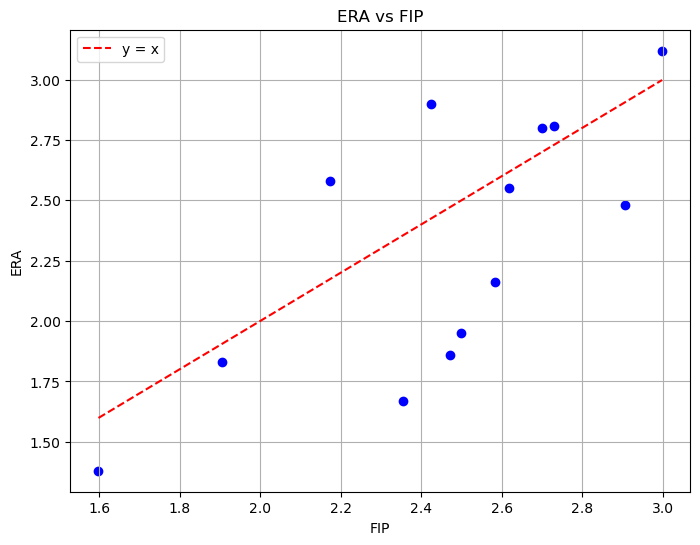

In [4]:
# 散布図で比較
plt.figure(figsize=(8, 6))
plt.scatter(df['FIP'], df['ERA'], color='blue')
plt.plot([df['FIP'].min(), df['FIP'].max()], [df['FIP'].min(), df['FIP'].max()], 'r--', label='y = x')
plt.xlabel('FIP')
plt.ylabel('ERA')
plt.title('ERA vs FIP')
plt.grid(True)
plt.legend()
plt.show()

## ERA予測モデルの構築（線形回帰）

In [5]:
# モデル用データ
X = df[['IP', 'HR', 'BB', 'HBP', 'K']]
y = df['ERA']

# 学習用とテスト用に分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 線形回帰モデル
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 評価
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

MAE: 0.2822876459543841
RMSE: 0.3779014432793507
R2 Score: 0.7036327459201377


## 特徴量の重要度（回帰係数）

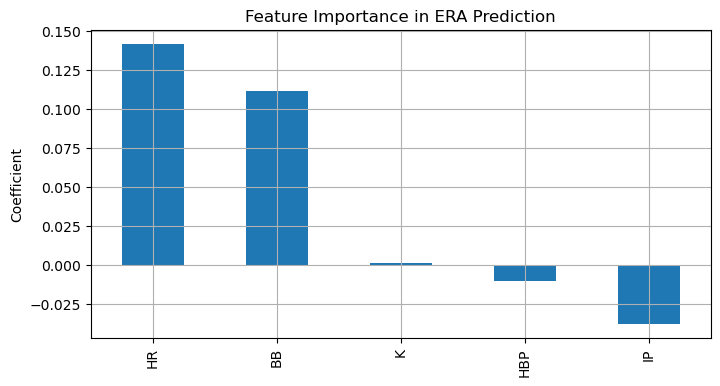

In [6]:
importance = pd.Series(model.coef_, index=X.columns).sort_values(ascending=False)
importance.plot(kind='bar', figsize=(8, 4), title='Feature Importance in ERA Prediction')
plt.ylabel('Coefficient')
plt.grid(True)
plt.show()